## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

%matplotlib inline

## Loading the Data

In [2]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
riders = pd.read_csv('data/Riders.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')


In [3]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [5]:
# Defines every variable
variables

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [6]:
train_rd = train.merge(riders, how='left', on='Rider Id')
test_rd = test.merge(riders, how='left', on='Rider Id')

# EDA

In [7]:

# Shape of data
print(train_rd.shape)
print(test_rd.shape)

(21201, 33)
(7068, 29)


 The combined dataset of train and rider has 21201 record and 33 columns
 
 
 The combined dataset of test and rider has 7068 record and 29 columns




In [8]:
print(train_rd.info(),'\n')
print(test_rd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

Temperature and Precipitation in millimeters columns have missing values

## Summary Statistics

In [9]:
train_rd.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


In [10]:
test_rd.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,7068.0,2.752122,0.624000,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,7068.0,15.621817,8.776650,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),7068.0,3.249859,1.580926,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,7068.0,15.621817,8.776650,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),7068.0,3.249859,1.580926,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,7068.0,15.621817,8.776650,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),7068.0,3.249859,1.580926,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,7068.0,15.621817,8.776650,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),7068.0,3.249859,1.580926,1.000000,2.000000,3.000000,5.000000,7.000000
Distance (KM),7068.0,9.458970,5.575689,1.000000,5.000000,8.000000,13.000000,47.000000


on both the training and test sets we observe that the mean is a bit higher thatn the meadian and we also have a huge difference between the 75th percentile and the max which tells us that we might be having outliers

## Missing values

In [11]:
train_rd.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [12]:
test_rd.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

in both datasets we have missing values in Temperature and Precipitation in millimeters

## Check Correlation using a Heatmap

Text(0.5, 1, 'Heatmap')

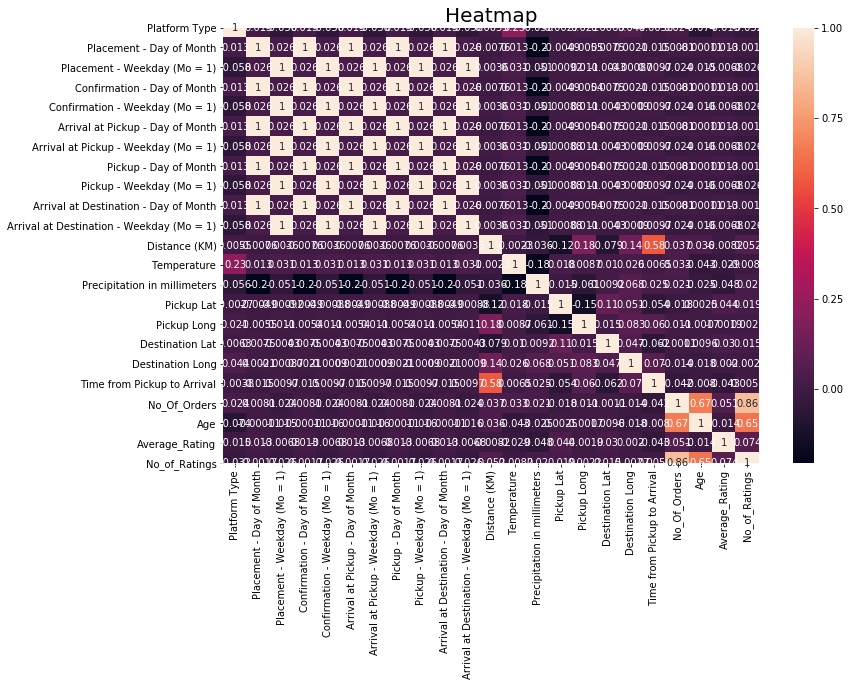

In [13]:
import matplotlib.style as style

plt.figure(figsize=(12,8))
sns.heatmap(train_rd.corr(),annot=True) 
plt.title('Heatmap', fontsize=20)

Values closer or equal to 1 are positively correlated

## replacing missing values

### Temperature Feature

In [14]:
# Number of missing values
print('Train missing values :',train_rd['Temperature'].isnull().sum())
print('Test missing values  :',test_rd['Temperature'].isnull().sum())

Train missing values : 4366
Test missing values  : 1437


In [15]:
## replace missing values
train_temp = train_rd['Temperature'].median()
train_rd['Temperature'].fillna(train_temp, inplace=True)

test_temp = train_rd['Temperature'].median()
test_rd['Temperature'].fillna(test_temp, inplace=True)

In [16]:
# Number of missing values
print('Train missing values :',train_rd['Temperature'].isnull().sum())
print('Test missing values  :',test_rd['Temperature'].isnull().sum())

Train missing values : 0
Test missing values  : 0


I replaced values with median since we have outliers

### Feature Precipitation in millimeters

In [17]:
print('Percentage of missing values\n')
print('Train missing values :',train_rd['Precipitation in millimeters'].isnull().mean().round(5)*100,'%')
print('Test missing values  :',test_rd['Precipitation in millimeters'].isnull().mean().round(5)*100,'%')

Percentage of missing values

Train missing values : 97.396 %
Test missing values  : 97.184 %


In [18]:
## replace missing values
train_rd['Precipitation in millimeters'].fillna(0, inplace=True)
test_rd['Precipitation in millimeters'].fillna(0, inplace=True)

In [19]:
print('Percentage of missing values\n')
print('Train missing values :',train_rd['Precipitation in millimeters'].isnull().mean().round(5)*100,'%')
print('Test missing values  :',test_rd['Precipitation in millimeters'].isnull().mean().round(5)*100,'%')

Percentage of missing values

Train missing values : 0.0 %
Test missing values  : 0.0 %


$\approx$ 97% of the data is missing or unknown so I might drop the entire column or replace the missing data with 0's


In [20]:
# Saving Clean Data
train_rd.to_csv('train_clean.csv')
test_rd.to_csv('test_clean.csv')

# Feature Selection

In [21]:
Droppers = ["Order No","User Id","Vehicle Type",'Rider Id']

In [22]:
# Numeric columns
Numeric_Train = train_rd._get_numeric_data()
Numeric_Test = test_rd._get_numeric_data()
Numeric_Train.head(2)

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,9,5,9,5,9,5,9,5,9,...,0.0,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,12,5,12,5,12,5,12,5,12,...,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69


In [23]:
Categorical_Train = train_rd.select_dtypes(include=['object'])
Categorical_Test = test_rd.select_dtypes(include=['object'])

Categorical_Train.head(2)

,Order No,User Id,Vehicle Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Rider Id
0,Order_No_4211,User_Id_633,Bike,Business,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM,Rider_Id_432
1,Order_No_25375,User_Id_2285,Bike,Personal,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM,Rider_Id_856


In [24]:
Categorical_Train = Categorical_Train.drop(Droppers, axis=1)
Categorical_Test = Categorical_Test.drop(Droppers, axis=1)

In [25]:
Categorical_Train.head(1)

,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
0,Business,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM


### Encoding Variables

In [26]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [27]:
# apply le on categorical feature columns
encoded_categorical_Train = Categorical_Train.apply(lambda x: le.fit_transform(x))
encoded_categorical_Test = Categorical_Test.apply(lambda x: le.fit_transform(x))

encoded_categorical_Train.head()

,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
0,0,14964,15164,130,808,1048
1,1,2379,2590,3096,3182,3992
2,0,4992,5105,5260,5342,5355
3,0,14679,14793,15138,15247,120
4,1,15544,15639,100,151,626


In [28]:
encoded_categorical_Train.columns

Index(['Personal or Business', 'Placement - Time', 'Confirmation - Time',
       'Arrival at Pickup - Time', 'Pickup - Time',
       'Arrival at Destination - Time'],
      dtype='object')

In [29]:
#Rejoining numeric and categorical columns
train_encoded = pd.concat([encoded_categorical_Train, Numeric_Train], axis=1)
test_encoded = pd.concat([encoded_categorical_Test, Numeric_Test], axis=1)

In [30]:
train_encoded.columns

Index(['Personal or Business', 'Placement - Time', 'Confirmation - Time',
       'Arrival at Pickup - Time', 'Pickup - Time',
       'Arrival at Destination - Time', 'Platform Type',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [31]:
test_encoded.head(2)

,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,0,4995,5071,5148,5296,3,27,3,27,3,...,23.5,0.0,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171
1,0,2368,2397,2598,2668,3,17,5,17,5,...,23.5,0.0,-1.272639,36.794723,-1.277007,36.823907,488,273,14.4,45


## Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Selecting the columns to be used as data for accuracy testing
X = train_encoded.drop('Time from Pickup to Arrival', axis = 1)
#assigning the target column
y = train_encoded['Time from Pickup to Arrival']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
print('Features\n',X_train.values,'\n')
print('Response\n',y_train.values)


Features
 [[    0.   5854.   6394.  ...   339.     15.     14. ]
 [    0.   8929.   9355.  ...   367.     14.4   131. ]
 [    0.   2334.   2655.  ...   875.     14.2   243. ]
 ...
 [    0.   5766.   5804.  ...  2489.     13.9  2104. ]
 [    0.   9834.  11407.  ...   446.     12.6    93. ]
 [    0.   1211.   1221.  ...   339.     14.6   119. ]] 

Response
 [ 869  282  912 ... 1004 2452  756]


In [36]:
# Model Imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Linear Regression

In [37]:
linear_regress = LinearRegression()
linear_regress.fit(X_train, y_train)
y_pred_train_lr = linear_regress.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_train_lr)))
print("R2  :", r2_score(y_test, y_pred_train_lr))

RMSE: 796.0420024241797
R2  : 0.34759972962705754


## Ridge Regression

In [38]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
y_pred_train_rr= rr.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_train_rr)))
print("R2  :", r2_score(y_test, y_pred_train_rr))

RMSE: 796.0423059568662
R2  : 0.3475992321034497


## Lasso Regression

In [39]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
y_pred_train_lasso= model_lasso.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_train_lasso)))
print("R2  :", r2_score(y_test, y_pred_train_lasso))

RMSE: 796.1247024265102
R2  : 0.3474641681709948


C:\Users\Sizwe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3608046256.020631, tolerance: 1654412.127172353
  positive)


## Train and Predict

In [40]:
df_train = train_encoded.copy()
df_test = test_encoded.copy()

df_train.columns.tolist()

['Personal or Business',
 'Placement - Time',
 'Confirmation - Time',
 'Arrival at Pickup - Time',
 'Pickup - Time',
 'Arrival at Destination - Time',
 'Platform Type',
 'Placement - Day of Month',
 'Placement - Weekday (Mo = 1)',
 'Confirmation - Day of Month',
 'Confirmation - Weekday (Mo = 1)',
 'Arrival at Pickup - Day of Month',
 'Arrival at Pickup - Weekday (Mo = 1)',
 'Pickup - Day of Month',
 'Pickup - Weekday (Mo = 1)',
 'Arrival at Destination - Day of Month',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Distance (KM)',
 'Temperature',
 'Precipitation in millimeters',
 'Pickup Lat',
 'Pickup Long',
 'Destination Lat',
 'Destination Long',
 'Time from Pickup to Arrival',
 'No_Of_Orders',
 'Age',
 'Average_Rating',
 'No_of_Ratings']

In [41]:
df_test.columns.tolist()

['Personal or Business',
 'Placement - Time',
 'Confirmation - Time',
 'Arrival at Pickup - Time',
 'Pickup - Time',
 'Platform Type',
 'Placement - Day of Month',
 'Placement - Weekday (Mo = 1)',
 'Confirmation - Day of Month',
 'Confirmation - Weekday (Mo = 1)',
 'Arrival at Pickup - Day of Month',
 'Arrival at Pickup - Weekday (Mo = 1)',
 'Pickup - Day of Month',
 'Pickup - Weekday (Mo = 1)',
 'Distance (KM)',
 'Temperature',
 'Precipitation in millimeters',
 'Pickup Lat',
 'Pickup Long',
 'Destination Lat',
 'Destination Long',
 'No_Of_Orders',
 'Age',
 'Average_Rating',
 'No_of_Ratings']

In [42]:

X = df_train.drop(['Time from Pickup to Arrival',
                      'Arrival at Destination - Time',
                      'Arrival at Destination - Day of Month',
                      'Arrival at Destination - Weekday (Mo = 1)',], axis=1)
# 
y = df_train['Time from Pickup to Arrival']

# Defining the train and test sets
X_Final_Train = X
X_Final_Test = df_test
Y_Final_Train = y

In [43]:
print(X_Final_Train.shape)
print(X_Final_Test.shape)



(21201, 25)
(7068, 25)


In [44]:
linear_regress = LinearRegression()
linear_regress.fit(X_Final_Train, Y_Final_Train)
y_pred_train_lr = linear_regress.predict(X_Final_Test)

submission= pd.DataFrame({'Order No': test_rd['Order No'], 
                           'Time from Pickup to Arrival': y_pred_train_lr})
submission.to_csv('sendy_logistic_sizweexplore.csv',index = False)

In [45]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_Final_Train, Y_Final_Train) 
y_pred_train_lasso= model_lasso.predict(X_Final_Test)


submission = pd.DataFrame({'Order No': test_rd['Order No'], 
                           'Time from Pickup to Arrival': y_pred_train_lasso})
submission.to_csv('sendy_logistic_sizweexplore2.csv',index = False)

C:\Users\Sizwe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5349890996.0295315, tolerance: 2066371.6501507382
  positive)


In [46]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state = 0)
dtree.fit(X_Final_Train, Y_Final_Train)
y_pred_train_dt = dtree.predict(X_Final_Test)


submission = pd.DataFrame({'Order No': test_rd['Order No'], 
                           'Time from Pickup to Arrival': y_pred_train_dt})
submission.to_csv('sendy_logistic_sizweexplore3.csv',index = False)

In [47]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfreg.fit(X_Final_Train, Y_Final_Train)
y_pred_train_rfreg = rfreg.predict(X_Final_Test)

submission = pd.DataFrame({'Order No': test_rd['Order No'], 
                           'Time from Pickup to Arrival': y_pred_train_rfreg})
submission.to_csv('sendy_logistic_sizweexplore4.csv',index = False)

In [48]:
# rreg = Ridge(alpha=0.01)
# rreg.fit(X_Final_Train, Y_Final_Train) 
# y_pred_train_rreg= rreg.predict(X_Final_Train)

# submission_file = pd.DataFrame({'Order No': test_rd['Order No'], 
#                            'Time from Pickup to Arrival': y_pred_train_rreg})
# submission_file.to_csv('sendy_logistic_sizweexplore5.csv',index = False)

Winning model to predic Time from Pickup to Arrival is RandomForestRegressor 

## Save Model

In [49]:
import pickle

model_save_path = "randomforest.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rfreg,file)